# Case Study 2 : Data Science in Financial Data

**Recommended Readings:** 
* [Quantopian Tutorials](https://www.quantopian.com/tutorials/) 
* Please register an account in [Quantopian online notebook system](https://www.quantopian.com/notebooks/).
* Upload this file into the system and start working on your idea.


**NOTE**
* Please download your code (notebook file as an ipynb file) and include it in your submission.


# Problem: pick a data science problem that you plan to solve using Stock Price Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data available and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

Hedge funds often operate on a fundamental principle: Higher the risk, higher the reward.

It basically translates to higher returns on high risk equities and securities. 
Hedge fund managers make money for their investors by investing on riskier equities trading through stocks or options. 
By doing so, they are raising the potential for total losses for the investor.


# Data Collection/Processing: 

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from quantopian.pipeline import Pipeline
from quantopian.pipeline.data import EquityPricing
from quantopian.pipeline.domain import US_EQUITIES
from quantopian.pipeline.data import morningstar
#from quantopian.pipeline.data.sentdex import sentiment
from quantopian.research import run_pipeline,returns, symbols, get_pricing
#from quantopian.pipeline.data.psychsignal import twitter_withretweets as twitter_sentiment
from quantopian.pipeline.factors import SimpleMovingAverage, DailyReturns
from quantopian.pipeline.filters.morningstar import Q1500US

Create and Run a Pipeline that will contain factors such as estimated_growth_factor, PE_ratio, mean_sentiment_5day and positive_sentiment_pct.

In [107]:
#Creating and running the pipeline that contains some of the crucial factors.
billion = 1000000000
#setting the universe
universe = Q1500US()

# Construct a factor that simply gets the price value.

# Get the latest daily price for all equities.
price = EquityPricing.open.latest

#Calculating the market capital
market_cap= morningstar.valuation.market_cap.latest

#Getting the Earnings per share
norm_eps = morningstar.earnings_report.normalized_basic_eps.latest

#get the P/E ratio
pe_ratio = morningstar.valuation_ratios.pe_ratio.latest 

#get the PEG (Price/ Earnings Growth) ratio
peg_ratio = morningstar.valuation_ratios.peg_ratio.latest 

# Define a 5-day simple moving average sentiment factor.
#mean_sentiment_5day = SimpleMovingAverage(inputs=[sentiment.sentiment_signal], window_length=5)

# Define a positive sentiment percent factor, dividing the number of bull
# scored messages by the total number of scanned messages for the equity.
#positive_sentiment_pct = (
#    twitter_sentiment.bull_scored_messages.latest
#    / twitter_sentiment.total_scanned_messages.latest
#)


# Add the factor to the pipeline.
pipe = Pipeline(
            columns={
            'open_price': price,
            'norm_eps': norm_eps,
            'pe_ratio': pe_ratio,
            'peg_ratio': peg_ratio,
        #   'mean_sentiment_5day': mean_sentiment_5day,
      #     'positive_sentiment_pct': positive_sentiment_pct,
            'market_cap' : market_cap,
            'big_business': 10 * billion < market_cap < 2000 * billion
            },
        screen = universe,
        domain=US_EQUITIES,
    )

# Run the pipeline over a year and print the result.
factor_data = run_pipeline(pipe, '2020-10-21', '2020-10-21')
print("Result contains {} rows of output.".format(len(factor_data)))
factor_data.head()


Result contains 1491 rows of output.


big_business    market_cap  \
2020-10-21 00:00:00+00:00 Equity(2 [HWM])           True  7.946498e+09   
                          Equity(24 [AAPL])        False  2.009719e+12   
                          Equity(53 [ABMD])         True  1.250197e+10   
                          Equity(62 [ABT])          True  1.918546e+11   
                          Equity(67 [ADSK])         True  5.642930e+10   

                                             norm_eps  open_price    pe_ratio  \
2020-10-21 00:00:00+00:00 Equity(2 [HWM])   -0.109330       18.76   14.124031   
                          Equity(24 [AAPL])  0.652500      116.20   35.636088   
                          Equity(53 [ABMD])  0.951124      283.35   79.750000   
                          Equity(62 [ABT])   0.299588      108.35   63.000000   
                          Equity(67 [ADSK])  0.483339      261.41  157.877301   

                                             peg_ratio  
2020-10-21 00:00:00+00:00 Equity(2 [HWM])       0.5640  
                          Equity(24 [AAPL])     2.9013  
                          Equity(53 [ABMD])     1.3815  
                          Equity(62 [ABT])      3.4446  
                          Equity(67 [ADSK])     1.4807

Checking for null data in the dataframe

In [108]:
factor_data.isnull().sum()

big_business      0
market_cap        0
norm_eps         13
open_price        0
pe_ratio        122
peg_ratio       289
dtype: int64

In [109]:
#Remove null values
factor_data.dropna(axis=0,inplace=True)
factor_data.head(10)

big_business    market_cap  \
2020-10-21 00:00:00+00:00 Equity(2 [HWM])            True  7.946498e+09   
                          Equity(24 [AAPL])         False  2.009719e+12   
                          Equity(53 [ABMD])          True  1.250197e+10   
                          Equity(62 [ABT])           True  1.918546e+11   
                          Equity(67 [ADSK])          True  5.642930e+10   
                          Equity(76 [TAP])           True  7.563091e+09   
                          Equity(110 [RAMP])         True  3.921030e+09   
                          Equity(114 [ADBE])         True  2.372594e+11   
                          Equity(122 [ADI])          True  4.568498e+10   
                          Equity(128 [ADM])          True  2.826576e+10   

                                              norm_eps  open_price  \
2020-10-21 00:00:00+00:00 Equity(2 [HWM])    -0.109330       18.76   
                          Equity(24 [AAPL])   0.652500      116.20   
                          Equity(53 [ABMD])   0.951124      283.35   
                          Equity(62 [ABT])    0.299588      108.35   
                          Equity(67 [ADSK])   0.483339      261.41   
                          Equity(76 [TAP])    1.116408       35.06   
                          Equity(110 [RAMP]) -0.303601       59.16   
                          Equity(114 [ADBE])  1.969384      495.25   
                          Equity(122 [ADI])   1.063892      122.96   
                          Equity(128 [ADM])   0.766845       50.83   

                                                pe_ratio  peg_ratio  
2020-10-21 00:00:00+00:00 Equity(2 [HWM])      14.124031     0.5640  
                          Equity(24 [AAPL])    35.636088     2.9013  
                          Equity(53 [ABMD])    79.750000     1.3815  
                          Equity(62 [ABT])     63.000000     3.4446  
                          Equity(67 [ADSK])   157.877301     1.4807  
                          Equity(76 [TAP])     35.063063    24.9359  
                          Equity(110 [RAMP])  629.714286     2.0013  
                          Equity(114 [ADBE])   62.289673     2.3604  
                          Equity(122 [ADI])    41.344482     2.4217  
                          Equity(128 [ADM])    16.200637     2.0776

In [110]:
factor_data = factor_data[factor_data['big_business'] == True] #Filter for big businesses

In [111]:
factor_data.index = factor_data.index.droplevel(0)  #dropping date index

In [112]:
factor_data.head(10) #Visualization

,big_business,market_cap,norm_eps,open_price,pe_ratio,peg_ratio
Equity(2 [HWM]),True,7.946498e+09,-0.109330,18.76,14.124031,0.5640
Equity(53 [ABMD]),True,1.250197e+10,0.951124,283.35,79.750000,1.3815
Equity(62 [ABT]),True,1.918546e+11,0.299588,108.35,63.000000,3.4446
Equity(67 [ADSK]),True,5.642930e+10,0.483339,261.41,157.877301,1.4807
Equity(76 [TAP]),True,7.563091e+09,1.116408,35.06,35.063063,24.9359
Equity(110 [RAMP]),True,3.921030e+09,-0.303601,59.16,629.714286,2.0013
Equity(114 [ADBE]),True,2.372594e+11,1.969384,495.25,62.289673,2.3604
Equity(122 [ADI]),True,4.568498e+10,1.063892,122.96,41.344482,2.4217
Equity(128 [ADM]),True,2.826576e+10,0.766845,50.83,16.200637,2.0776
Equity(161 [AEP]),True,4.499137e+10,0.980941,91.90,23.676240,2.8510


In [113]:
factor_data.drop(['big_business'], axis=1, inplace = True) #drop big_business column because it is Boolean

In [114]:
factor_data.head() #visualization

,market_cap,norm_eps,open_price,pe_ratio,peg_ratio
Equity(2 [HWM]),7.946498e+09,-0.109330,18.76,14.124031,0.5640
Equity(53 [ABMD]),1.250197e+10,0.951124,283.35,79.750000,1.3815
Equity(62 [ABT]),1.918546e+11,0.299588,108.35,63.000000,3.4446
Equity(67 [ADSK]),5.642930e+10,0.483339,261.41,157.877301,1.4807
Equity(76 [TAP]),7.563091e+09,1.116408,35.06,35.063063,24.9359


Getting the pricing data for the last year

In [115]:
#Get the pricing data for Daily Pricing
daily_price = get_pricing(
          factor_data.index, 
          fields ={'open_price','close_price','high','low'}, #price, open_price, close_price, high, low
          start_date = '2019-10-20',
          end_date = pd.datetime.today(),
          frequency = 'daily',
          )

print(type(daily_price))

<class 'pandas.core.panel.Panel'>


In [116]:
# compute returns
r = returns(
    assets= factor_data.index,
    start='2019-10-20',
    end='2020-10-20',
    frequency ='daily'
)
r.head()

,Equity(2 [HWM]),Equity(53 [ABMD]),Equity(62 [ABT]),Equity(67 [ADSK]),Equity(76 [TAP]),Equity(110 [RAMP]),Equity(114 [ADBE]),Equity(122 [ADI]),Equity(128 [ADM]),Equity(161 [AEP]),...,Equity(52838 [CVET]),Equity(52968 [FOXA]),Equity(53095 [ZM]),Equity(53116 [BYND]),Equity(53196 [CTVA]),Equity(53924 [PPD]),Equity(54055 [OTIS]),Equity(54057 [CARR]),Equity(54335 [ACI]),Equity(54353 [MTCH])
2019-10-21 00:00:00+00:00,0.001483,0.003535,-0.013889,0.013320,0.003159,0.020673,0.005236,0.014978,0.018665,0.003717,...,-0.004916,0.017229,-0.005068,-0.000636,-0.021117,NaN,NaN,NaN,NaN,NaN
2019-10-22 00:00:00+00:00,0.001481,-0.029428,-0.013475,-0.010247,0.037255,-0.023630,-0.021548,-0.001976,0.004459,-0.003496,...,-0.065217,0.021715,-0.057321,-0.032727,0.018811,NaN,NaN,NaN,NaN,NaN
2019-10-23 00:00:00+00:00,0.006286,0.047179,0.009068,0.013424,0.002864,0.030319,0.001226,-0.048068,0.003929,0.003508,...,-0.047569,-0.006892,0.002306,-0.080573,-0.014260,NaN,NaN,NaN,NaN,NaN
2019-10-24 00:00:00+00:00,0.006247,0.005198,0.001100,0.024237,-0.009581,0.022457,0.031751,-0.002563,-0.004422,0.013022,...,-0.023307,-0.027393,0.038572,0.039897,0.029292,NaN,NaN,NaN,NaN,NaN
2019-10-25 00:00:00+00:00,0.007669,0.014180,0.003446,0.001307,-0.034806,0.006564,0.004709,0.014535,0.011589,-0.014106,...,0.004545,0.002483,-0.016889,-0.010518,0.014055,NaN,NaN,NaN,NaN,NaN


In [117]:
r.shape 

(253, 1170)

Finding Columns with null values

In [118]:
r.columns[r.isnull().any()] # null values check

Index([ Equity(53924 [PPD]), Equity(54055 [OTIS]), Equity(54057 [CARR]),
        Equity(54335 [ACI]), Equity(54353 [MTCH])],
      dtype='object')

In [119]:
#compute mean of the returns
ar = r.mean()

#compute standard deviations of the returns
sr = r.std()

#compute sharpe ratio 
sharpe_ratio = ar.div(sr)

sharpe_ratio.head()

Equity(2 [HWM])      0.020675
Equity(53 [ABMD])    0.072500
Equity(62 [ABT])     0.058216
Equity(67 [ADSK])    0.093341
Equity(76 [TAP])    -0.054381
dtype: float64

Add the Sharpe Ratio to the dataframe

In [120]:
factor_data['sharpe_ratio'] = sharpe_ratio
factor_data.head()

,market_cap,norm_eps,open_price,pe_ratio,peg_ratio,sharpe_ratio
Equity(2 [HWM]),7.946498e+09,-0.109330,18.76,14.124031,0.5640,0.020675
Equity(53 [ABMD]),1.250197e+10,0.951124,283.35,79.750000,1.3815,0.072500
Equity(62 [ABT]),1.918546e+11,0.299588,108.35,63.000000,3.4446,0.058216
Equity(67 [ADSK]),5.642930e+10,0.483339,261.41,157.877301,1.4807,0.093341
Equity(76 [TAP]),7.563091e+09,1.116408,35.06,35.063063,24.9359,-0.054381


# Data Exploration: Exploring the Dataset

**plot the weekly returns of a set of stocks of your choice** 


In [121]:
# computing daily returns for Microsoft, Google, Amazon and IBM
r_daily = returns(
    assets=symbols(["MSFT","GOOG","AMZN","IBM"]),
    start='2020-1-1',
    end='2020-9-1',
    frequency='daily'
)

# resampling dataframe to get weekly data
r_weekly = r_daily.resample('W-FRI', closed='right', label='right').last()
r_weekly.head()

,Equity(5061 [MSFT]),Equity(46631 [GOOG]),Equity(16841 [AMZN]),Equity(3766 [IBM])
2020-01-03 00:00:00+00:00,-0.013314,-0.006025,-0.012004,-0.008120
2020-01-10 00:00:00+00:00,-0.004751,0.006923,-0.009479,-0.000660
2020-01-17 00:00:00+00:00,0.005655,0.020573,-0.007241,0.002248
2020-01-24 00:00:00+00:00,-0.010979,-0.012684,-0.011944,-0.015889
2020-01-31 00:00:00+00:00,-0.015787,-0.014785,0.072169,0.050278


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f27e36136a0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f27e3bc2e10>], dtype=object)

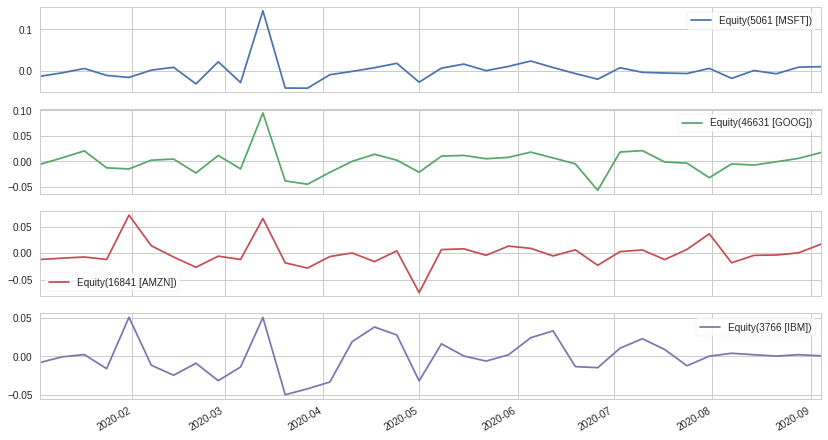

In [122]:
r_weekly.plot(subplots=True) 

Exploration of the factors used. 

In [123]:
factor_data.describe()

,market_cap,norm_eps,open_price,pe_ratio,peg_ratio,sharpe_ratio
count,1.170000e+03,1170.000000,1170.00000,1170.000000,1170.000000,1170.000000
mean,2.808373e+10,18.819623,375.61370,98.003548,6.292125,0.025930
std,9.024509e+10,620.825098,9243.06184,486.224341,32.430275,0.040583
min,5.022483e+08,-10.589353,2.31000,0.872483,-0.247800,-0.069130
25%,3.264005e+09,-0.013453,27.82750,15.410930,1.298425,-0.002546
50%,7.319056e+09,0.421972,58.86500,26.264007,2.156400,0.022563
75%,2.140105e+10,1.039944,114.71750,51.468254,3.697375,0.050322
max,1.623361e+12,21235.926341,316184.05000,8702.000000,839.318200,0.187878


In [124]:
a,b=factor_data.shape

In [125]:
factor_data.nlargest(5,'sharpe_ratio') # equities with largest sharpe_ratio

,market_cap,norm_eps,open_price,pe_ratio,peg_ratio,sharpe_ratio
Equity(53095 [ZM]),1.527398e+11,0.660000,572.33,679.772152,2.4442,0.187878
Equity(54057 [CARR]),2.878266e+10,0.300000,32.45,30.329471,3.6462,0.182925
Equity(39840 [TSLA]),3.938979e+11,0.112000,431.75,1019.178744,0.9974,0.177410
Equity(23710 [NLS]),8.034186e+08,0.489629,24.38,10.560000,1.2647,0.177270
Equity(14112 [NVAX]),6.027319e+09,-0.305067,102.70,72.916667,1.3218,0.164134


In [126]:
factor_data.nsmallest(5,'sharpe_ratio') # equities with smallest sharpe_ratio

,market_cap,norm_eps,open_price,pe_ratio,peg_ratio,sharpe_ratio
Equity(22766 [CVI]),1.180229e+09,0.129910,11.55,16.771429,0.7142,-0.069130
Equity(8347 [XOM]),1.424915e+11,-0.260000,33.66,20.059524,1.9247,-0.067247
Equity(45559 [ESRT]),1.840456e+09,-0.049219,6.39,45.285714,3.1225,-0.067199
Equity(3620 [HFC]),3.175503e+09,0.964833,19.70,20.238095,8.5261,-0.065924
Equity(4751 [MDP]),5.279588e+08,-3.732976,11.52,26.295455,1.6197,-0.061376


Visualizing Market Capitalization vs Market Open Price

In [127]:
rng = np.random.RandomState(0)
colors = rng.rand(a)

Text(0, 0.5, 'open_price')

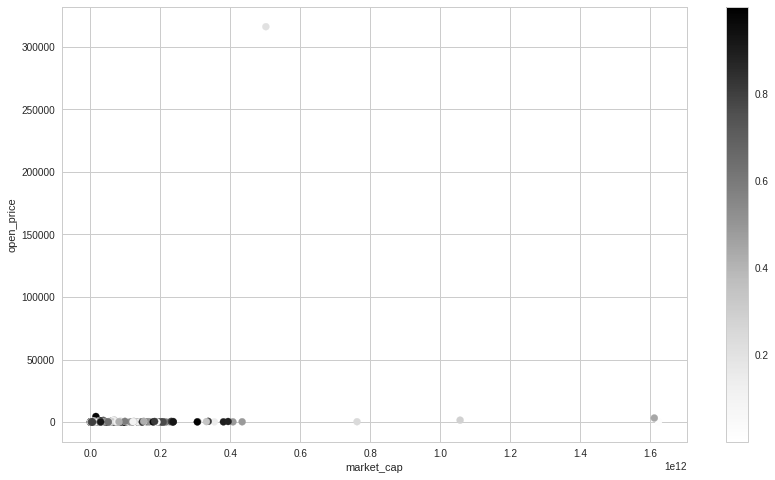

In [128]:
plt.scatter(factor_data["market_cap"],factor_data["open_price"],c=colors)
plt.colorbar()
plt.xlabel("market_cap")
plt.ylabel("open_price")

Visualizing Sharpe Ratio vs Open Price

Text(0, 0.5, 'open_price')

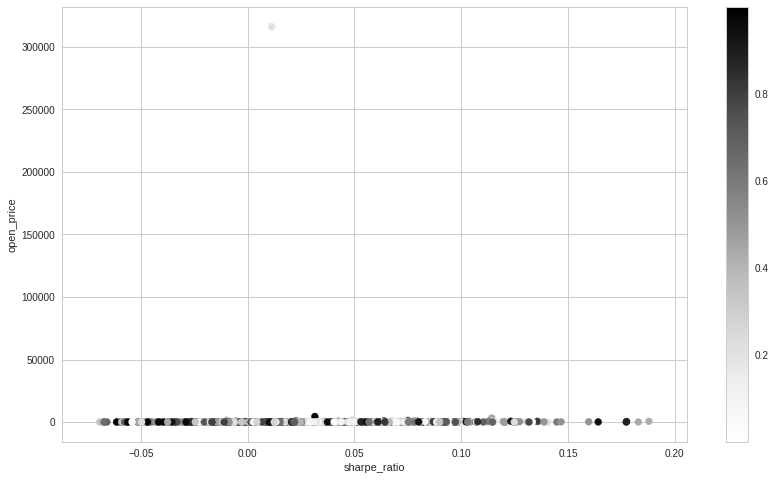

In [129]:
plt.scatter(factor_data["sharpe_ratio"],factor_data["open_price"], c=colors)
plt.colorbar()
plt.xlabel("sharpe_ratio")
plt.ylabel("open_price")

Visualizing PE Ratio vs Open Price

Text(0, 0.5, 'open_price')

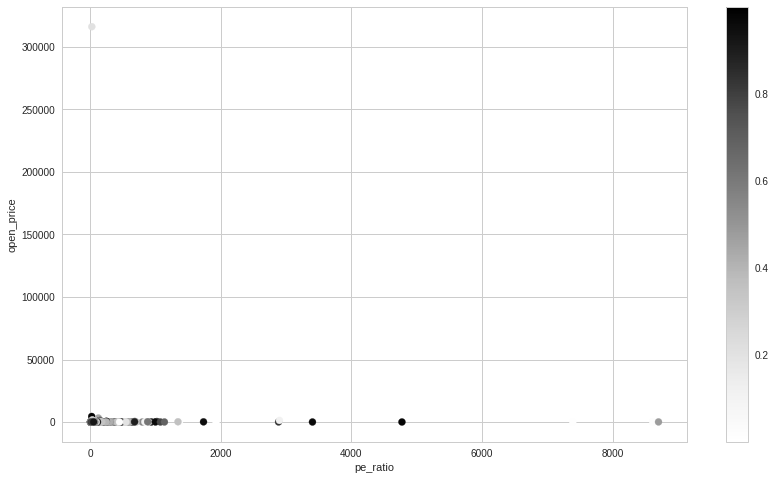

In [130]:
plt.scatter(factor_data["pe_ratio"],factor_data["open_price"], c=colors)
plt.colorbar()
plt.xlabel("pe_ratio")
plt.ylabel("open_price")

Visualizing PEG Ratio vs Open Price

Text(0, 0.5, 'open_price')

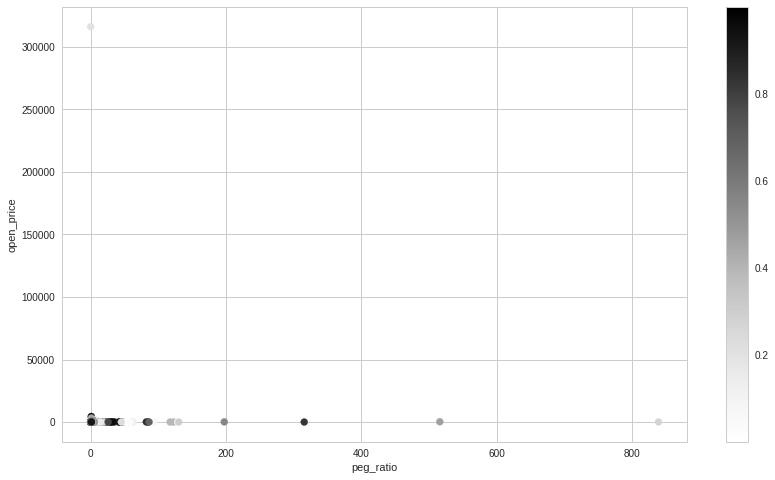

In [131]:
plt.scatter(factor_data["peg_ratio"],factor_data["open_price"], c=colors)
plt.colorbar()
plt.xlabel("peg_ratio")
plt.ylabel("open_price")

##Visualizing Postive Sentiment Percentage (most popular stocks on Twitter) vs Open Price

In [132]:
#plt.scatter(factor_data["positive_sentiment_pct"],factor_data["open_price"], c=colors)
#plt.colorbar()
#plt.xlabel("positive_sentiment_pct")
#plt.ylabel("open_price")

##Visualizing 5-day simple moving average sentiment factor vs Open Price

In [133]:
#plt.scatter(factor_data["mean_sentiment_5day"],factor_data["open_price"], c=colors)
#plt.colorbar()
#plt.xlabel("mean_sentiment_5day")
#plt.ylabel("open_price")

In [134]:
#factor_data = factor_data[factor_data['sharpe_ratio']>=0.1]

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:

What if we were to fundamentally transform the way hedge funds operate? 
If we could find a way for hedge funds to invest in equities that are less risky, but still provide a higher return, we are helping investors eliminate a part or all of their risk.

Our project aims at solving this problem by performing a risk analysis on several equities using various factors used to measure the financial health of an equity.
We do so by analyzing the P/E ratio, P/E growth ratio, EPS for several past quarters, market capitalization, Sharpe ratio and market sentiment through Twitter.

All the ratios are calculated for an adjusted closing price of an equity. We use a Morningstar fundamental data field called normalized_basic_eps since it is a more accurate representation of a company's 
recent quaterly earnings. The normalized EPS excludes one-time and unusual expenses and acts as a measure for a company's true earnings.

By relying on the accuracy of the factors used to measure a company's fundamentals, we perform due diligence for the investor, reducing a part of the risk.


Write codes to implement the solution in python:

In [135]:
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree for modelling

In [136]:
factor_data.isnull().sum() #check for null values

market_cap      0
norm_eps        0
open_price      0
pe_ratio        0
peg_ratio       0
sharpe_ratio    0
dtype: int64

Heat Map to find correlation between factors

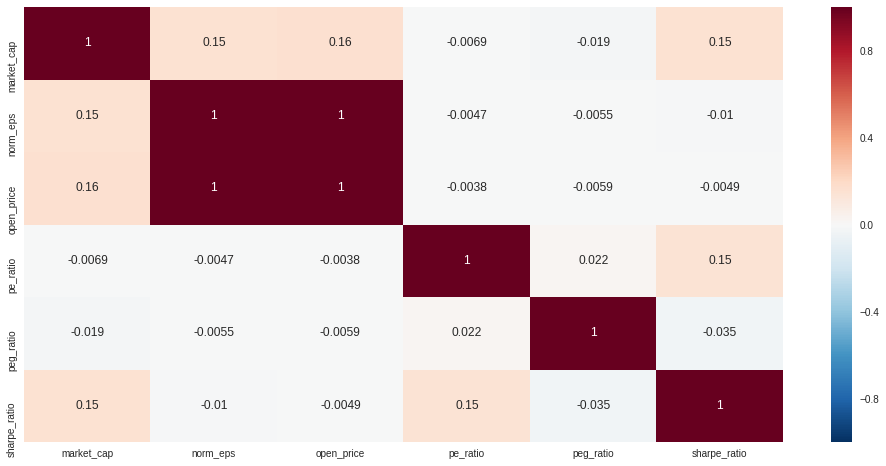

In [137]:
import seaborn as sns
plt.figure(1, figsize = (17,8))
cor = sns.heatmap(factor_data.corr(), annot = True)

Selecting features for the prediction model

In [138]:
X= factor_data[['norm_eps','sharpe_ratio','market_cap','peg_ratio','pe_ratio']]
y= factor_data['open_price']

In [139]:
print(X.shape)
print(y.shape)

(1170, 5)
(1170,)


In [140]:
#Set the training and testing variables
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=0)

X_train = X_train[:]
X_test = X_test[:]

In [141]:
print(X_train.shape, y_train.shape)

(877, 5) (877,)


In [142]:
#Regression 
reg = DecisionTreeRegressor(random_state = 0)

In [143]:
reg.fit(X_train, y_train)

/venvs/py35/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, random_state=0, splitter='best')

In [144]:
y_pred = reg.predict(X_test)

# Results: summarize and visualize the results discovered from the analysis

Please use figures, tables, or videos to communicate the results with the audience.


In [145]:
y_test_index = y_test.index
y_test_index

Index([ Equity(34440 [CXO]), Equity(32714 [LDOS]),  Equity(18113 [URI]),
        Equity(6295 [QCOM]),   Equity(8229 [WMT]),   Equity(5066 [MSM]),
       Equity(40399 [IPHI]),  Equity(16059 [NUS]),  Equity(11386 [SSD]),
       Equity(43981 [NCLH]),
       ...
        Equity(24838 [ALL]), Equity(44433 [TMHC]), Equity(20947 [KTOS]),
        Equity(16358 [SSB]),  Equity(10594 [EMN]),   Equity(4668 [MAT]),
         Equity(2293 [DRE]),  Equity(39958 [ENV]),  Equity(50716 [DXC]),
        Equity(5767 [PAYX])],
      dtype='object', length=293)

In [146]:
y_pred_df = pd.DataFrame(y_pred, index = y_test_index)
y_pred_df

,0
Equity(34440 [CXO]),29.350000
Equity(32714 [LDOS]),87.620000
Equity(18113 [URI]),75.970000
Equity(6295 [QCOM]),113.670000
Equity(8229 [WMT]),170.500000
Equity(5066 [MSM]),67.810000
Equity(40399 [IPHI]),96.590000
Equity(16059 [NUS]),75.000000
Equity(11386 [SSD]),85.810000
Equity(43981 [NCLH]),12.750000


In [147]:
#Difference between predicted price and actual price of an equity
diff = y_pred_df[0] - y_test[0]
diff

Equity(34440 [CXO])       -18.220000
Equity(32714 [LDOS])       40.050000
Equity(18113 [URI])        28.400000
Equity(6295 [QCOM])        66.100000
Equity(8229 [WMT])        122.930000
Equity(5066 [MSM])         20.240000
Equity(40399 [IPHI])       49.020000
Equity(16059 [NUS])        27.430000
Equity(11386 [SSD])        38.240000
Equity(43981 [NCLH])      -34.820000
Equity(51259 [ANGI])      144.380000
Equity(22316 [GRMN])       19.730000
Equity(5643 [OLN])        -25.600000
Equity(21724 [ARNA])      -24.590000
Equity(12616 [ACIW])       25.770000
Equity(50428 [AA])        -25.600000
Equity(34395 [LULU])       80.430000
Equity(2968 [NEE])        330.390000
Equity(35359 [DAN])        35.550000
Equity(128 [ADM])          98.360000
Equity(239 [AIG])         -33.150000
Equity(16348 [DGX])         5.570000
Equity(110 [RAMP])        137.489000
Equity(52968 [FOXA])        4.920000
Equity(38965 [FTNT])       58.320000
Equity(7041 [TRV])        -34.770000
Equity(12087 [O])         -10.420000
E

In [148]:
#Accuracy Measurement

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 60.7041014295
Mean Squared Error: 22365.3507847
Root Mean Squared Error: 149.550495769


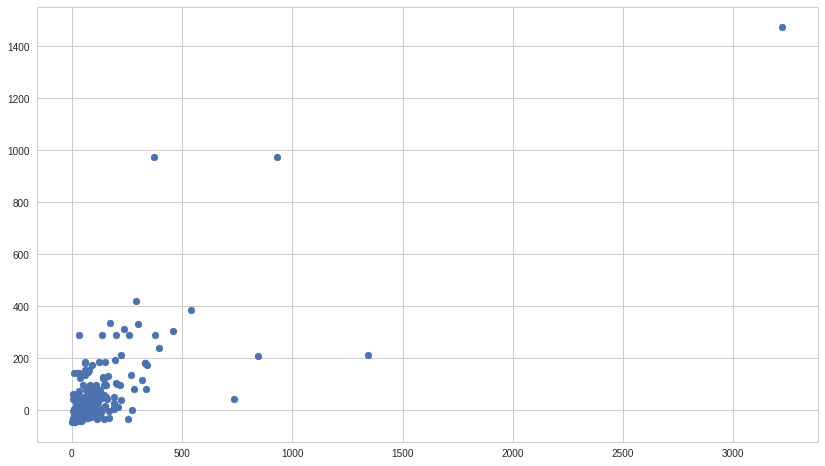

In [149]:
plt.scatter(y_test, diff)

# Future Works

- The developer needs to be aware of the Bias in the training model, while he improves on accuracy.

- Because Sharpe Ratio uses Standard Deviation of returns in the denominator to evaluate portfolio risks, the assumptions is, the returns are normally distributed. However, returns in the financial market are skewed away from the average because of a large number of surprising drops or spikes in prices. Even then, Sharpe Ratio can be skewed away by portfolio managers for higher returns.  
  



# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "jupyter notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.

* **PPT Slides**: please prepare PPT slides to present about the case study . Each team present their case studies in class for 7 minutes.

Please compress all the files in a zipped file.


**How to submit:**

        Please submit through Canvas, in the Assignment "Case Study 2".
        
**Note: Each team only needs to submit one submission in Canvas**